In [1]:
# Importing numpy and pandas libraries to read the data

# Suppress Warnings
import warnings
warnings.filterwarnings('ignore')

# Import the numpy and pandas package
import numpy as np
import pandas as pd

# Read the given CSV file, and view some sample records - assign that to a variable
EarthquakeData = pd.read_csv("Polygence Natural Disaster Data - attempt 5.csv") # Where you read in files - remember that you read data and import modules

In [2]:
# display shape of the dataset
EarthquakeData.shape

# display info of the dataset
EarthquakeData.info()

# describe the dataset
EarthquakeData.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27 entries, 0 to 26
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Magnitude       27 non-null     float64
 1   MonetaryDamage  27 non-null     int64  
 2   Date​​          27 non-null     object 
dtypes: float64(1), int64(1), object(1)
memory usage: 776.0+ bytes


,Magnitude,MonetaryDamage
count,27.000000,2.700000e+01
mean,6.744444,5.271205e+09
std,0.461047,1.880574e+10
min,6.000000,5.000000e+04
25%,6.400000,1.250000e+06
50%,6.700000,8.000000e+06
75%,7.050000,4.315000e+08
max,7.800000,9.110000e+10


In [3]:
# Creating x and y
x = EarthquakeData['Magnitude'] # The x values will be equal to the variable magnitude
y = EarthquakeData['MonetaryDamage'] # The y values will be equal to the variable cost - look for the column

In [4]:
# Splitting the data into train and test sets
from sklearn.model_selection import train_test_split
x_train, x_test_lm, y_train, y_test_lm = train_test_split(x, y, train_size = 0.7, test_size = 0.3) # Divide the data with 3/5 going to the train set and the other 2/5 going to the test set
# Note that there is no need for random state - don't need to randomize everything


In [5]:
# Take a look at the train dataset
x_train
y_train

19         200000
5      6000000000
26         500000
10        2000000
12       30000000
0      3000000000
17       40000000
21          50000
16        6000000
14        2100000
4        48300000
18        8000000
23         250000
25         350000
7       358000000
6         3000000
3     91100000000
15       60000000
Name: MonetaryDamage, dtype: int64

In [23]:
# Importing Statsmodels.api library from Statsmodel package
import statsmodels.api as sm

# Adding a constant to get an intercept, using the Statsmodel.api library
x_train_sm = sm.add_constant(x_train)
# define an x test version
x_test_sm = sm.add_constant(x_test_lm) # makes sure the size is alright

In [7]:
# Debugging
print(x_train_sm.isna().sum()) # 5 magnitude errors 
print(y_train.isna().sum()) # keep the number of x and y values the same
# Delete the pairs of x and y values with the nans (there's a missing value, either the x or the y) - check before using the cost data

const        0
Magnitude    0
dtype: int64
0


In [8]:
# Fitting the resgression line using 'OLS' which stamds for ordinarily least squares
lr = sm.OLS(y_train, x_train_sm).fit() # One of the train sets is missing data

# Printing the parameters - CHECK
lr.params.const
lr.params.Magnitude

14668805265.158705

In [9]:
# Performing a summary to list out all the different parameters of the regression line fitted
lr.summary()

# summary statistics
# high p value means there isn't a strong enough correlation between the two variables 
# r squared value is 0 which means 0% of the data can be attributed to changes in the variable
# F statistic has a low p-value which means it cannot be trusted

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         MonetaryDamage   R-squared:                       0.081
Model:                            OLS   Adj. R-squared:                  0.023
Method:                 Least Squares   F-statistic:                     1.407
Date:                Wed, 15 Feb 2023   Prob (F-statistic):              0.253
Time:                        19:36:10   Log-Likelihood:                -452.42
No. Observations:                  18   AIC:                             908.8
Df Residuals:                      16   BIC:                             910.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -9.473e+10   8.47e+10     -1.118      0.280   -2.74e+11    8.49e+10
Magnitude   1.467e+10   1.24e+10      1.186      0.253   -1.15e+10    4.09e+10
==============================================================================
Omnibus:                       41.040   Durbin-Watson:                   2.083
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              117.624
Skew:                           3.357   Prob(JB):                     2.87e-26
Kurtosis:                      13.571   Cond. No.                         119.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

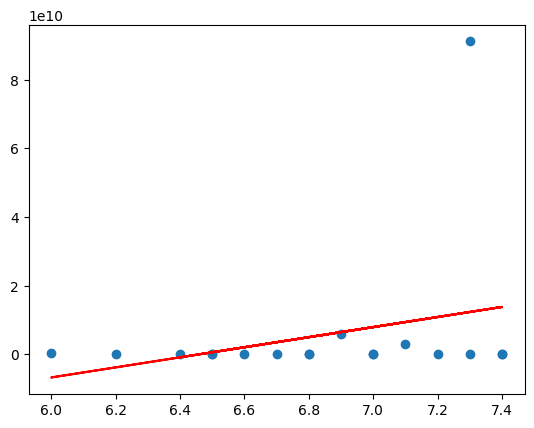

In [10]:
# Import plot
import matplotlib.pyplot as plt

# Visualizing the regression line
plt.scatter(x_train, y_train)
plt.plot(x_train, lr.params.const + lr.params.Magnitude*x_train, 'r') # Use the values calculated beforehand
plt.show() # Printing out/displaying the regression line plot

In [18]:
# Predicting y_value using training data of x or using the training data to then make prediction for the y
y_train_pred = lr.predict(x_train_sm) # using model to predict y, training the x data and we need to predict the y data
# we need to use the test data to make output

# Creating residuals from the y_train data and predicted y_data
res = (y_train - y_train_pred) # Determine how closely the two are related? - the difference in reality/actual versus predictions

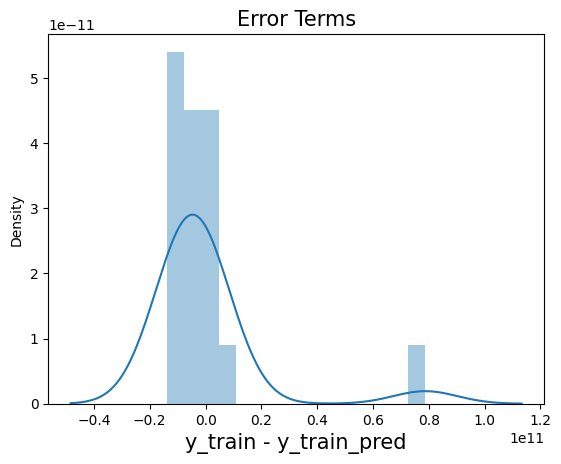

In [12]:
# Plotting the histogram using the residual values
# is it more inclined to have a smaller difference in real vs. predicted or more inclined to have a larger difference...
import seaborn as sns # make stats graphs!
fig = plt.figure()
sns.distplot(res, bins = 15)
plt.title('Error Terms', fontsize = 15) # Title of the plot
plt.xlabel('y_train - y_train_pred', fontsize = 15) # Labelling the x-axis
# Density is a ratio and frequency is a number?
plt.show()
# slight right skew but not relevant b/c most of the data is consolidated around 0, a couple outliers or are the outliers so bad that we can't ignore them?
# 1) Edit the plots to include units and label the axes and graph title well (make data easier to interpret)
# 2) Think about how the model would be used (how accurate would we want the model to be? how much error could we make?)

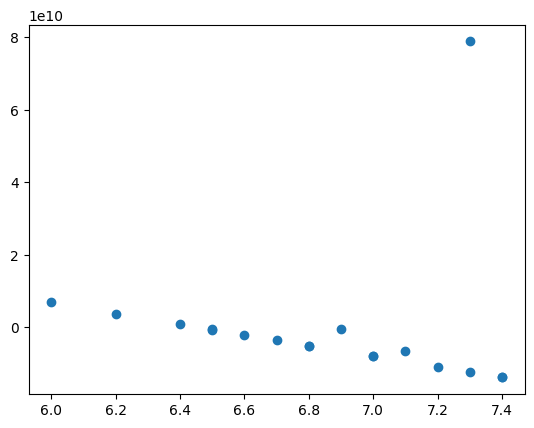

In [16]:
# Looking for any patterns in the residuals
plt.scatter(x_train,res)
plt.show()

# adding axes are the same as earlier, residual plots should not look random (trend towards something)

In [25]:
# Importing r2_square
from sklearn.metrics import r2_score

y_test_pred = lr.predict(x_test_sm) 

# Checking the R-squared value
r_squared = r2_score(y_test_lm, y_test_pred)
r_squared

-0.26232784729172565

In [26]:
# Visualize the line on the test set
plt.scatter(x_test_lm, y_test)
plt.plot(x_test_lm, y_test_pred, 'r')
plt.show() # Display the linear regression model using the testing data set

NameError: name 'y_test' is not defined

In [ ]:
# Shape of the train set without adding column
x_train_lm.shape

# Adding additional column to the train and test data
x_train_lm = x_train_lm.values.reshape(-1,1)
x_test_lm = x_test_lm.values.reshape(-1,1)

print(x_train_lm.shape)
print(x_test_lm.shape)

In [ ]:

from sklearn.linear_model import LinearRegression

# Creating an object of Linear Regression
lm = LinearRegression()

# Fit the model using .fit() method
lm.fit(x_train_lm, y_train_lm)

In [ ]:
# Intercept value
print("Intercept :",lm.intercept_)

# Slope value
print('Slope :',lm.coef_)

In [ ]:
# Making Predictions of y_value
y_train_pred = lm.predict(x_train_lm)
y_test_pred = lm.predict(x_test_lm)

# Comparing the r2 value of both train and test data
print(r2_score(y_train,y_train_pred))
print(r2_score(y_test,y_test_pred))